In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn import linear_model

In [12]:
from sklearn.datasets import load_iris

In [13]:
iris=load_iris()

In [14]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [18]:
df['target']=iris.target
df.head()  #0 is for setosa 1 is for versicolor 2 is for virginica

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [21]:
df[df.target==2].head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [22]:
df.shape

(150, 5)

In [24]:
#now we will assign the names of the flowers to the target
df['flower_name']=df.target.apply(lambda x:iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [26]:
# now we will be splitting the data sets into three cat setosa from 0 to 50 ,versicolor from 50 to 100,virginica from 100 to 150
df0=df[:50]
df1=df[50:100]
df2=df[100:]

In [27]:
%matplotlib inline

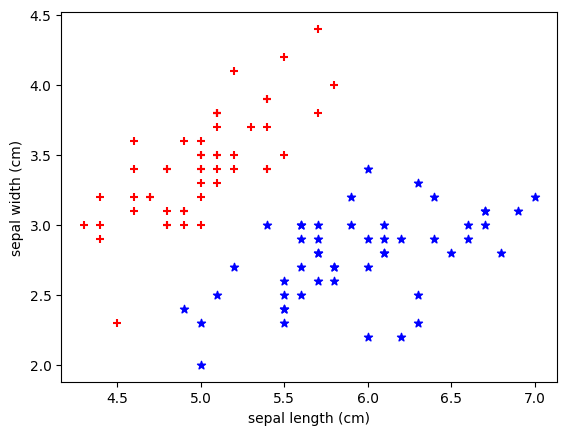

In [31]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'],color='red',marker='+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color='blue',marker='*')

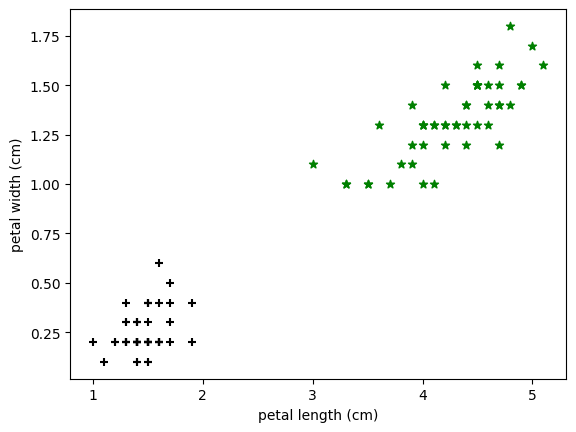

In [32]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['petal length (cm)'],df0['petal width (cm)'],color='black',marker='+')
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],color='green',marker='*')

In [33]:
from sklearn.model_selection import train_test_split

In [35]:
X=df.drop(['target','flower_name'],axis='columns')
Y=df.target

In [36]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [37]:
len(X_train)


120

In [38]:
len(X_test)

30

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)

In [43]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [44]:
knn.score(X_test,Y_test)

0.9666666666666667

In [51]:
# by using confusion matrix we will get to know which classes has predicted correctly and which didnt
from sklearn.metrics import confusion_matrix

In [52]:
y_predicted=knn.predict(X_test)

In [53]:
cm=confusion_matrix(Y_test,y_predicted)
cm

array([[10,  0,  0],
       [ 0, 10,  0],
       [ 0,  1,  9]], dtype=int64)

In [55]:
%matplotlib inline
import seaborn as sb

Text(95.72222222222221, 0.5, 'Truth')

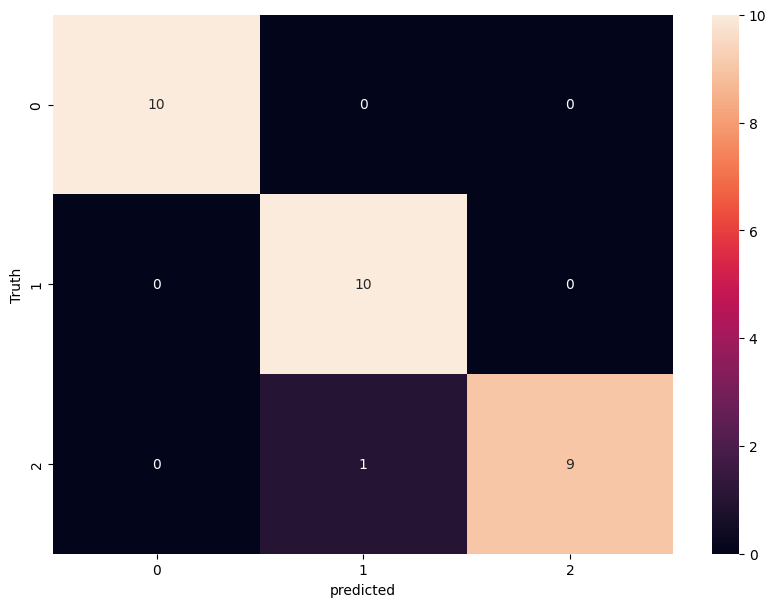

In [56]:
plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [59]:
# we can also use classification reports instead of confusion metrics
from sklearn.metrics import classification_report

In [60]:
classification_report(Y_test,y_predicted)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00        10\n           1       0.91      1.00      0.95        10\n           2       1.00      0.90      0.95        10\n\n    accuracy                           0.97        30\n   macro avg       0.97      0.97      0.97        30\nweighted avg       0.97      0.97      0.97        30\n'

In [61]:
import pickle

In [62]:
with open("Trained knn","wb") as f:
    pickle.dump(knn,f)